# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fawaz Amajida
- **Email:** fawazamajidaa@gmail.com / a002ybf166@devacademy.id
- **ID Dicoding:** a002ybf166

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara variabel kondisi lingkungan dalam dataset (weather, dll.) terhadap variabel jumlah sepeda yang dipinjam (cnt) dalam suatu hari?<br>
    - Specific:<br>
    Pertanyaan fokus terhadap topik jumlah sepeda yang dipinjam.
    - Measurable:<br>
    Kondisi lingkungan dapat diukur secara kualitatif (cuaca) atau kuantitatif (temperatur) dan jumlah sepeda dapat diukur secara diskret dalam satuan unit.
    - Action-oriented:<br>
    Jawaban dari pertanyaan akan digunakan untuk menentukan berapa jumlah sepeda yang harus tersedia untuk memenuhi permintaan pasar pada suatu hari dengan kondisi lingkungan tertentu dan berapa jumlah sepeda yang dapat ditarik dari peredaran untuk dirawat (*maintenance*).
    - Relevant:<br>
    Pemasalahan yang dingin diselesaikan melalui pertanyaan ini adalah ketidaktahuan perusahaan atas kebutuhan pasar di kondisi tertentu. Dengan mengetahui informasi tersebut, perusahaan dapat memaksimalkan profit dengan memasok sepeda sesuai kebutuhan pasar selagi melaksanakan perawatan sepeda secara berkala.
    - Time-bound:<br>
    Berdasarkan Readme.txt dataset, waktu perekaman dataset adalah sepanjang tahun 2011 dan 2012. Dataset ini mungkin sudah tidak relevan dalam merepresentasikan atau memprediksi kondisi nyata saat proyek ini dikerjakan yaitu pada tahun 2025. Akan tetapi, dataset ini digunakan sebagai bahan pembelajaran. Satuan waktu yang digunakan untuk menghitung jumlah sepeda yang digunakan adalah per 1 hari dan per 1 jam.  

    >Lebih lanjut, pertanyaan tersebut dapat dipecah menjadi sebagai berikut.
    >- Musim apa yang menghasilkan jumlah peminjaman tertinggi?
    >- Cuaca apa yang menghasilkan jumlah peminjaman tertinggi?
    >- Berapa rentang temperatur yang menghasilkan jumlah peminjaman terbanyak?
    >- Berapa rentang kelembapan yang menghasilkan jumlah peminjaman terbanyak?  

- Bagaimana hubungan antara variabel waktu terhadap jumlah peminjaman dalam suatu hari?
    - Specific:<br>
    Pertanyaan fokus terhadap topik jumlah peminjaman sepeda.
    - Measurable:<br>
    Waktu dapat diukur dalam bentuk tanggal atau musim dan jumlah sepeda dapat diukur dalam satuan unit.
    - Action-oriented:<br>
    Jawaban dari pertanyaan akan digunakan untuk menentukan rencana perusahaan dalam menyediakan sepeda agar dapat memaksimalkan keuntungan pada waktu-waktu dengan permintaan pasar yang tinggi.
    - Relevant:<br>
    Pemasalahan yang dingin diselesaikan melalui pertanyaan ini adalah ketidaktahuan perusahaan atas kebutuhan pasar di hari tertentu. Dengan mengetahui informasi tersebut, perusahaan dapat memaksimalkan profit dengan memasok sepeda sesuai kebutuhan pasar selagi melaksanakan perawatan sepeda secara berkala.
    - Time-bound:<br>
    Aspek waktu dari pertanyaan dapat dijawab dalam satuan hari, bulan, atau musim.  

    >Sama halnya seperti pertanyaan pertama, pertanyaan kedua dapat dipecah menjadi beberapa pertanyaan seperti "Kapan bulan dengan peminjaman terbanyak?", "Kapan musim dengan peminjaman terbanyak?", dan "Kapan hari dengan peminjaman terbanyak?".  

- Apa yang dapat dilakukan perusahaan untuk meningkatkan keuntungan berdasarkan insights yang diperoleh?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [2]:
# Mengimport dataset
df_day = pd.read_csv(r"data\day.csv", delimiter=",")
df_hour = pd.read_csv(r"data\hour.csv", delimiter=",")

In [3]:
df_day.head() # Menampilkan 5 baris data dari dataset day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour.head() # Menampilkan 5 baris data dari dataset hou

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Mengecek apakah nilai variabel dalam dataset day merupakan rata-rata dari dataset hour
df_rerataHariPertama = df_hour[df_hour['dteday'] == "2011-01-01"].select_dtypes(include='number').mean()
print("Rata-rata nilai variabel hari pertama (df_hour):\n", df_rerataHariPertama.iloc[8:13])
print("\nNilai variabel hari pertama (df_hour): \n", df_day.iloc[0,8:13])

Rata-rata nilai variabel hari pertama (df_hour):
 weathersit    1.583333
temp          0.344167
atemp         0.363625
hum           0.805833
windspeed     0.160446
dtype: float64

Nilai variabel hari pertama (df_hour): 
 weathersit           2
temp          0.344167
atemp         0.363625
hum           0.805833
windspeed     0.160446
Name: 0, dtype: object


**Insight:**
- Dataset day dan hour memiliki variabel yang sama, sesuai dengan Readme.txt.
- Nilai variabel temp, atemp, hum, windspeed dalam dataset day.csv merupakan rata-rata dari dataset hour.csv selama satu hari.
- Nilai variabel casual, registered, dan cnt dalam day.csv sama dengan penjumlahan nilai variabel tersebut dalam hour.csv pada satu hari yang sama.
- Nilai variabel weathersit dalam dataset day.csv diduga merupakan pembulatan menjadi bilangan bulat dari rata-rata nilai weathersit di dataset hour.csv selama satu hari.
- Tidak ada penjelasan lebih lanjut terkait makna "casual" dan "registered". Dengan demikian, diasumsikan bahwa casual users adalah pengguna yang meminjam tanpa mendaftar sedangkan registered user adalah pengguna yang melakukan peminjaman menggunakan akun terdaftar.

### Assessing Data

#### Missing Value

In [6]:
# Mengecek missing value
assess_null = pd.concat([df_day.isnull().sum(), df_hour.isnull().sum()], axis = 1)
assess_null.columns = ['df_day', 'df_hour']
print(assess_null)

            df_day  df_hour
instant        0.0        0
dteday         0.0        0
season         0.0        0
yr             0.0        0
mnth           0.0        0
holiday        0.0        0
weekday        0.0        0
workingday     0.0        0
weathersit     0.0        0
temp           0.0        0
atemp          0.0        0
hum            0.0        0
windspeed      0.0        0
casual         0.0        0
registered     0.0        0
cnt            0.0        0
hr             NaN        0


#### Invalid Value

In [7]:
df_invalidValueCheck = pd.concat([df_day.dtypes, df_hour.dtypes], axis=1)
df_invalidValueCheck.columns = ['Day', 'Hour']
print(df_invalidValueCheck)

                Day     Hour
instant       int64    int64
dteday       object   object
season        int64    int64
yr            int64    int64
mnth          int64    int64
holiday       int64    int64
weekday       int64    int64
workingday    int64    int64
weathersit    int64    int64
temp        float64  float64
atemp       float64  float64
hum         float64  float64
windspeed   float64  float64
casual        int64    int64
registered    int64    int64
cnt           int64    int64
hr              NaN    int64


Variabel 'dteday' memiliki tipe data object sehingga perlu diubah menjadi datetime agar dapat dilakukan operasi perbandingan dan operasi lainnya.

#### Duplicated Data

In [8]:
# Mengecek duplicate data
print("Data duplikat dalam df_day: ", df_day.duplicated().sum())
print("Data duplikat dalam df_hour: ", df_hour.duplicated().sum())

Data duplikat dalam df_day:  0
Data duplikat dalam df_hour:  0


#### *Inaccurate value* dan *Inconsistent Value*

- **Inaccurate value**<br>
    *Inaccurate value* yang disebabkan oleh ketidaksesuaian antara nilai dalam data dan hasil observasi tidak dapat diperiksa secara langsung karena penulis tidak memiliki akses lengkap terhadap metode perekaman data. Dataset ini tersusun atas dataset inti (*core dataset*) dan dataset pendukung dari beberapa sumber. Akurasi dataset dapat divalidasi lebih lanjut dengan melakukan studi literatur terhadap sumber-sumber tersebut sebagai berikut.
    - Bike sharing (core dataset): http://capitalbikeshare.com/system-data
    - Weather information: http://www.freemeteo.com
    - Holiday information: http://dchr.dc.gov/page/holiday-schedule (halaman sudah tidak tersedia)<br>
    
- **Incosistent Value**<br>
    Berdasarkan tipe data, tidak terdapat inkonsistensi dalam dataset yang digunakan. Akan tetapi, terdapat variabel yang ada dalam hour.csv tetapi tidak ada dalam day.csv yaitu hr (*hour*) karena memang data day.csv merupakan kumulasi dari data hour.csv. Dengan kata lain, hour.csv memuat data yang lebih rinci dengan variabel hr.

#### Outlier

In [9]:
def cari_outlier(dataframe):
    Q1 = dataframe["cnt"].quantile(0.25)
    Q3 = dataframe["cnt"].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    outlier = dataframe[(dataframe["cnt"] < batas_bawah) | (dataframe["cnt"] > batas_atas)]
    jumlah_outlier = outlier.shape[0]
    return jumlah_outlier

print("Outlier dari dataset day.csv: ", cari_outlier(df_day))
print("Outlier dari dataset hour.csv: ", cari_outlier(df_hour))

Outlier dari dataset day.csv:  0
Outlier dari dataset hour.csv:  505


Dalam hour.csv, terdapat 505 outlier. Boxplot dibuat untuk mendapat interpretasi awal.

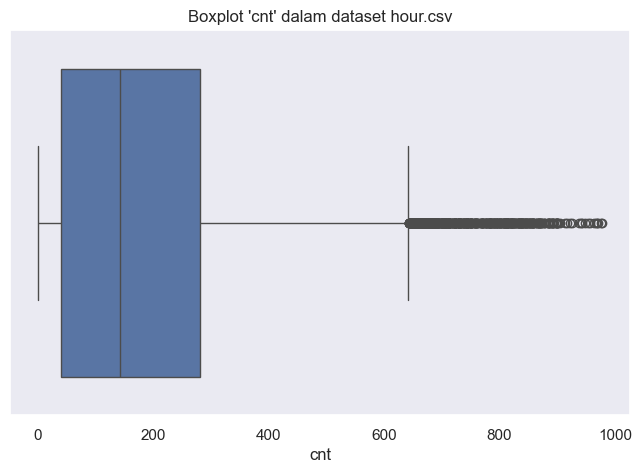

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_hour["cnt"])
plt.title("Boxplot 'cnt' dalam dataset hour.csv")
plt.show()

#### Insight

**Insight:**
- Tidak terdapat missing value dan duplicated data dalam kedua dataset.
- Tipe data 'dteday', yang diidentifikasi sebagai *invalid value*, perlu diubah dari object menjadi datetime.
- Inkonsistensi nilai antara kedua dataset merupakan konsekuensi dari penjumlahan atau perubahan rentang waktu dari awalnya per jam menjadi per hari. Dengan kata lain, day.csv dan hour.csv merupakan dataset dengan basis yang sama.
- Perlu dilakukan analisis lebih lanjut terkait akurasi dataset.
- Terdapat jam-jam tertentu dengan jumlah peminjaman tinggi yang menjadi outlier dalam dataset hour.csv.
- Variabel season dan weathersit dapat dikonversi menjadi string (1:springer, 2:summer, 3:fall, 4:winter) dan 

### Cleaning Data

#### Define
Terdapat invalid value berupa tipe data 'dteday' yang harus diubah dari object menjadi datetime.

#### Code

In [11]:
# Mengubah tipe data variabel 'dteday' dari object menjadi datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

Tipe data 'dteday' telah diubah menjadi datetime

#### Test

In [12]:
# Mengecek tipe data dteday setelah diubah
print("Tipe data dteday dalam day.csv: ", df_day['dteday'].dtypes)
print("Tipe data dteday dalam hour.csv: ", df_hour['dteday'].dtypes)

Tipe data dteday dalam day.csv:  datetime64[ns]
Tipe data dteday dalam hour.csv:  datetime64[ns]


**Insight:**
- Variabel 'dteday' diubah menjadi datetime
- Outliers dalam hour.csv tidak perlu dihilangkan karena bukan diakibatkan oleh kesalahan pengukuran melainkan akibat tingginya permintaan (*demand*) pada jam-jam tertentu. Outliers ini dapat digunakan untuk mencari rentang waktu dengan permintaan tinggi sehingga perusahaan dapat bersiap untuk waktu tersebut.

## Exploratory Data Analysis (EDA)

### Explorasi Menggunakan describe()

In [13]:
# Melihat data dengan beberapa parameter statistik sederhana
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [14]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Eksplorasi Korelasi Antarvariabel

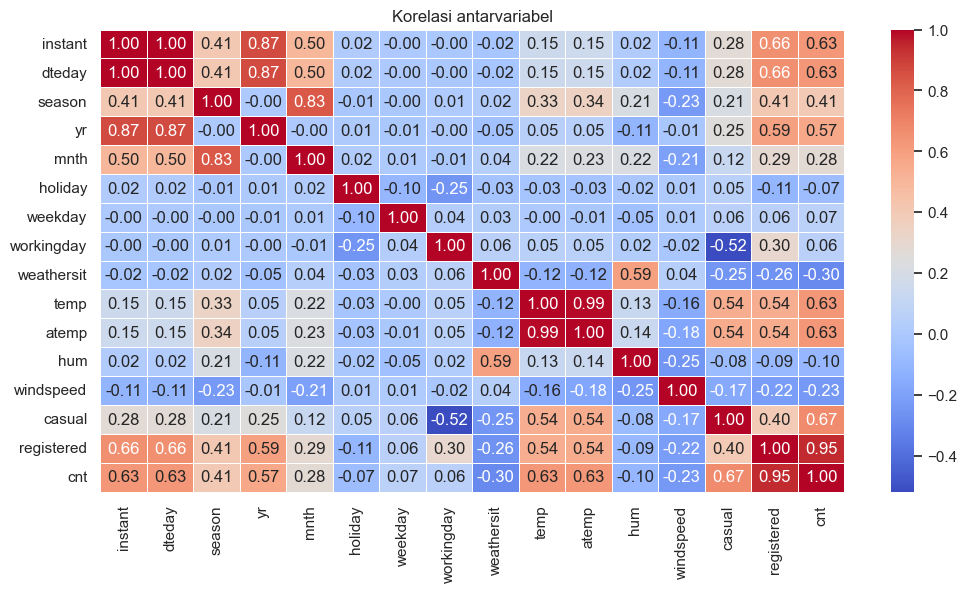

In [15]:
# Membuat matrix korelasi
corr_matrix = df_day.corr()

# Memvisualisasikan korelasi menggunakan heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi antarvariabel")
plt.show()

### Eksplorasi Menggunakan Pivot Table

In [16]:
# Melihat hubungan antara season dan weathersit
df_day.groupby(by=["season","weathersit"]).agg({
    "cnt":["sum","mean"]
})

cnt             
                      sum         mean
season weathersit                     
1      1           312036  2811.135135
       2           155573  2357.166667
       3             3739   934.750000
2      1           626986  5548.548673
       2           288096  4236.705882
       3             3507  1169.000000
3      1           799443  5878.257353
       2           250679  5222.479167
       3            11007  2751.750000
4      1           519487  5043.563107
       2           302510  4654.000000
       3            19616  1961.600000

In [17]:
# Melihat hubungan hari libur dan jumlah peminjaman terhadap musim
df_day.groupby(by="season").agg({
    "holiday": lambda x: (x == 1).sum(),
    "cnt": ["sum", "mean"]
})

holiday      cnt             
       <lambda>      sum         mean
season                               
1             7   471348  2604.132597
2             4   918589  4992.331522
3             4  1061129  5644.303191
4             6   841613  4728.162921

In [18]:
# Melihat hubungan temperatur dan jumlah peminjaman terhadap musim
df_day.groupby(by="season").agg({
    "temp": ["max", "mean"],
    "cnt": ["sum", "max", "mean"]
})

temp                cnt                   
             max      mean      sum   max         mean
season                                                
1       0.572500  0.297748   471348  7836  2604.132597
2       0.808333  0.544405   918589  8362  4992.331522
3       0.861667  0.706309  1061129  8714  5644.303191
4       0.657500  0.422906   841613  8555  4728.162921

In [19]:
# Melihat hubungan antara bulan dengan jumlah peminjaman sepeda
df_day.groupby(by="mnth").agg({
    "cnt": ["sum", "max", "min", "mean"]
})

cnt                         
         sum   max   min         mean
mnth                                 
1     134933  4521   431  2176.338710
2     151352  5062  1005  2655.298246
3     228920  8362   605  3692.258065
4     269094  7460   795  4484.900000
5     331686  8294  2633  5349.774194
6     346342  8120  3767  5772.366667
7     344948  8173  3285  5563.677419
8     351194  7865  1115  5664.419355
9     345991  8714  1842  5766.516667
10    322352  8156    22  5199.225806
11    254831  6852  1495  4247.183333
12    211036  6606   441  3403.806452

In [20]:
print("Data dengan peminjaman paling sedikit:\n", df_day.loc[df_day["cnt"].idxmin()])
print("\nData dengan peminjaman paling banyak:\n", df_day.loc[df_day["cnt"].idxmax()])

Data dengan peminjaman paling sedikit:
 instant                       668
dteday        2012-10-29 00:00:00
season                          4
yr                              1
mnth                           10
holiday                         0
weekday                         1
workingday                      1
weathersit                      3
temp                         0.44
atemp                      0.4394
hum                          0.88
windspeed                  0.3582
casual                          2
registered                     20
cnt                            22
Name: 667, dtype: object

Data dengan peminjaman paling banyak:
 instant                       624
dteday        2012-09-15 00:00:00
season                          3
yr                              1
mnth                            9
holiday                         0
weekday                         6
workingday                      0
weathersit                      1
temp                     0.608333
atemp      

In [21]:
df_day.groupby(by="yr").agg(
    casual_sum=("casual", "sum"),
    registered_sum=("registered", "sum")
).assign(
    ratio_casual_to_registered=lambda x: x["casual_sum"] / x["registered_sum"]
)

,casual_sum,registered_sum,ratio_casual_to_registered
yr,,,
0,247252,995851,0.248282
1,372765,1676811,0.222306


**Insight:**
- Casual dan working day memiliki korelasi terbalik sebesar -0.52, artinya pengguna kasual akan meningkat di hari libur dan weekends. 
- Temp (temperatur) dan cnt (jumlah peminjaman sepeda) berkorelasi searah dengan nilai 0.63, artinya pengguna cenderung meningkat seiring meningkatnya temperatur lingkungan. 
- Dteday (tanggal) dan cnt (jumlah peminjaman) memiliki korelasi berbanding lurus sebesar 0.63, artinya jumlah pelanggan cenderung meningkat seiring berjalannya waktu. Hal ini dapat disebabkan oleh peningkatan permintaan, peningkatan penawaran (ketersediaan sepeda), atau keduanya.
- Temp (**temperature**) dan atemp (**feeling temperature**) memiliki korelasi mendekati 1 (korelasi linear) sehingga selanjutnya analisis akan difokuskan hanya terhadap temp (temperatur).
- Pengguna cenderung meminjam sepeda saat cuaca cerah.
- Weathersit berkorelasi linear dengan kelembapan. Semakin cerah cuaca, semakin rendah kelembapan.
- Weathersit tidak berkorelasi linear terhadap season karena variabel tersebut bersifat kategorikal.
- Weathersit 1 (*Clear, Few clouds, Partly cloudy, Partly cloudy*) paling sering terjadi di musim gugur, weathersit 2 (*Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist*) paling sedikit terjadi di musim gugur, weathersit 3 (*Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds*) paling sering terjadi di musim dingin, dan weathersit 4 (*Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog*) tidak terjadi sama sekali sepanjang tahun 2011 dan 2012.
- Jumlah hari libur dalam suatu musim tidak memengaruhi jumlah peminjaman total pada musim tersebut.
- Peminjaman terbanyak terjadi pada musim gugur dan peminjaman paling sedikit terjadi pada musim semi.
- Tren jumlah peminjaman berdasarkan musim sejalan dengan tren jumlah peminjaman berdasarkan temperatur. Semakin tinggi temperatur, semakin banyak pengguna yang meminjam sepeda dan semakin banyak hari dengan temperatur tinggi pada suatu musim, semakin banyak peminjaman sepeda dalam musim tersebut.
- Peminjaman paling sedikit terjadi pada tanggal 2012-10-29 yaitu 22 peminjaman. Pada hari tersebut, terjadi Badai Sandy di New York City [https://en.wikipedia.org/wiki/Portal:Current_events/2012_October_29].
- Tidak ditemukan peristiwa unik pada tanggal dengan peminjaman terbanyak terjadi.
- Selaras dengan korelasi antara tanggal dan jumlah peminjaman sepeda yang berbanding lurus, baik pengguna casual maupun registered mengalami peningkatan dari tahun 2011 ke 2012 dengan ratio yang tidak jauh berbeda. Tren ini harus dipertahankan dengan strategi bisnis yang inovatif agar tidak ditinggalkan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

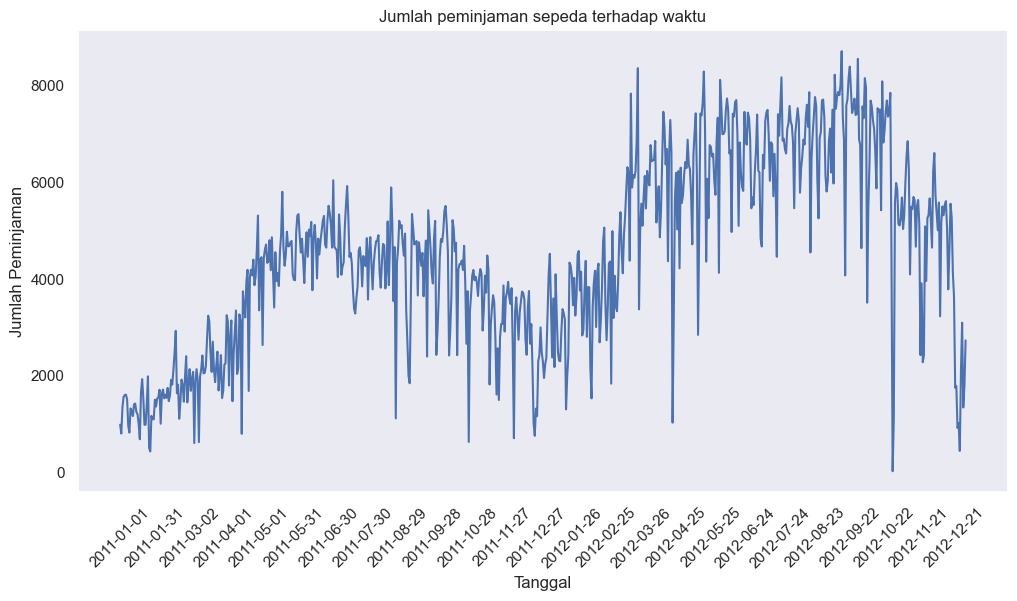

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_day["dteday"], y=df_day["cnt"], color="b")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.title("Jumlah peminjaman sepeda terhadap waktu")
plt.xticks(df_day["dteday"].iloc[::30], rotation=45)  # Display date in intervals
plt.show()

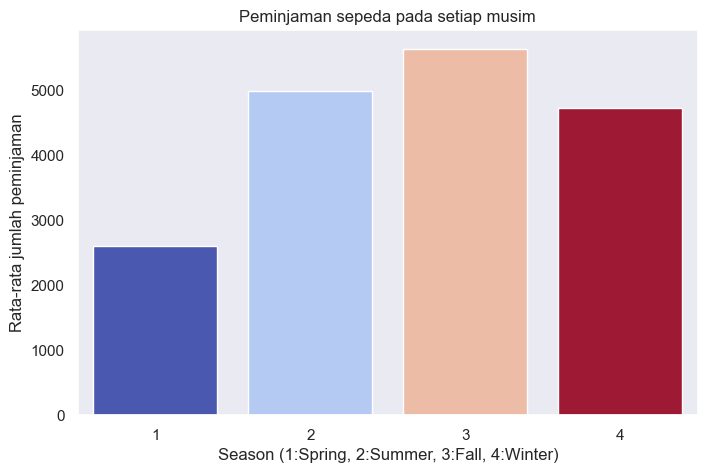

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df_day["season"], y=df_day["cnt"], errorbar=None, hue=df_day["season"], palette="coolwarm", legend=False)
plt.xlabel("Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)")
plt.ylabel("Rata-rata jumlah peminjaman")
plt.title("Peminjaman sepeda pada setiap musim")
plt.show()

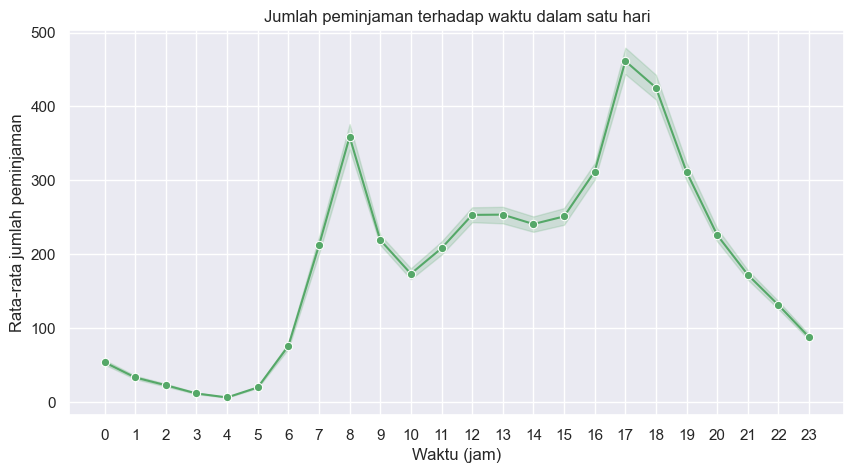

In [24]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_hour["hr"], y=df_hour["cnt"], estimator="mean", marker="o", color="g")
plt.xlabel("Waktu (jam)")
plt.ylabel("Rata-rata jumlah peminjaman")
plt.title("Jumlah peminjaman terhadap waktu dalam satu hari")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

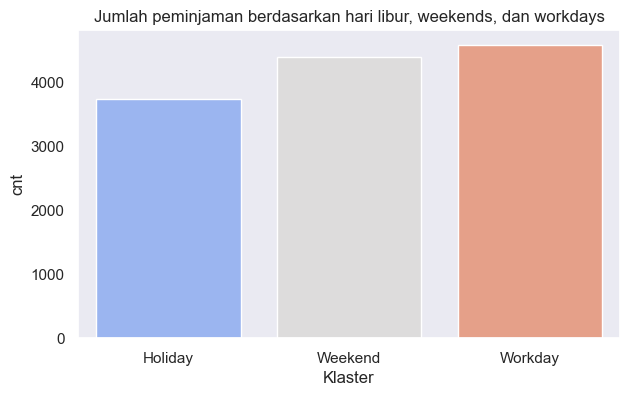

In [25]:
df_day["day_type"] = np.where(df_day["holiday"] == 1, "Holiday", np.where(df_day["workingday"] == 0, "Weekend", "Workday"))
klaster_hari = df_day.groupby("day_type")["cnt"].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.barplot(x=klaster_hari["day_type"], y=klaster_hari["cnt"], hue=klaster_hari["day_type"], palette="coolwarm")
plt.xlabel("Klaster")
plt.title("Jumlah peminjaman berdasarkan hari libur, weekends, dan workdays")
plt.show()

### Pertanyaan 2:

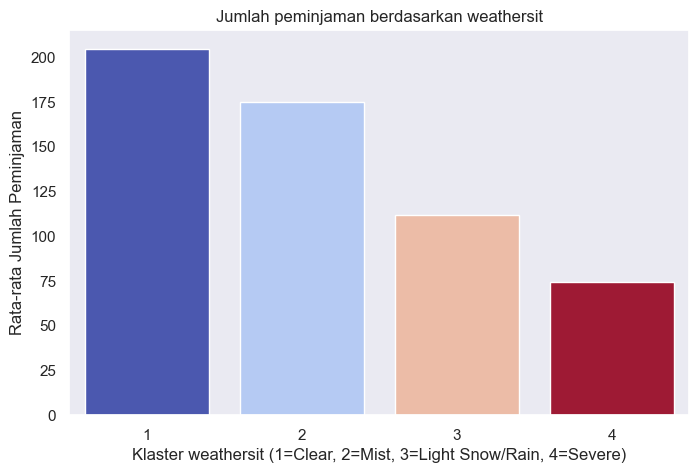

In [26]:
klaster_cuaca = df_hour.groupby("weathersit")["cnt"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=klaster_cuaca["weathersit"], y=klaster_cuaca["cnt"], hue=klaster_cuaca["weathersit"], legend=False, palette="coolwarm")
plt.xlabel("Klaster weathersit (1=Clear, 2=Mist, 3=Light Snow/Rain, 4=Severe)")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Jumlah peminjaman berdasarkan weathersit")
plt.show()

C:\Users\Fawaz Amajida\AppData\Local\Temp\ipykernel_30128\395754581.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  klaster_temperatur = df_day.groupby("temp_group")["cnt"].mean().reset_index()


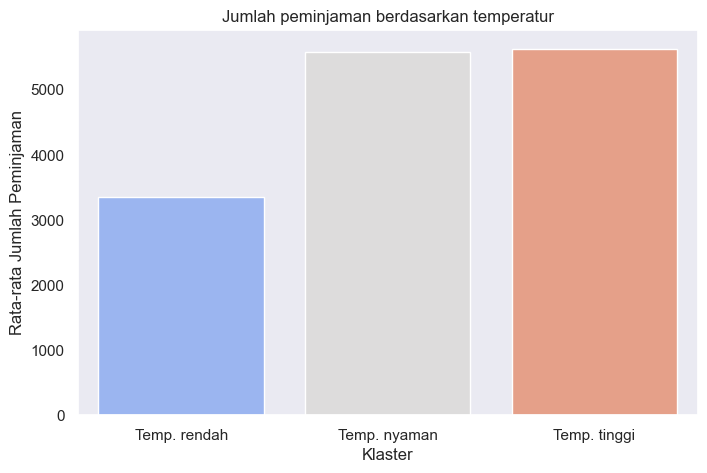

In [27]:
# Berdasarkan US EPA, temperatur lingkungan yang nyaman adalah 20-25 derajat celcius
bins = [0, 20/41, 25/41, 1.0]
labels = ["Temp. rendah", "Temp. nyaman", "Temp. tinggi"]
df_day["temp_group"] = pd.cut(df_day["temp"], bins=bins, labels=labels)
klaster_temperatur = df_day.groupby("temp_group")["cnt"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=klaster_temperatur["temp_group"], y=klaster_temperatur["cnt"], hue=klaster_temperatur["temp_group"], legend=False, palette="coolwarm")
plt.xlabel("Klaster")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Jumlah peminjaman berdasarkan temperatur")
plt.show()

**Insight:**
- Jumlah pelanggan mengalami kenaikan per tahun.
- Season dengan peminjaman terbanyak adalah musim gugur.
- Weathersit dengan peminjaman terbanyak adalah tipe 1 yaitu cuaca cerah.
- Temperatur yang cocok untuk pengguna adalah di atas 20 derajat Celcius.
- Pengguna lebih banyak melakukan peminjaman pada musim gugur
- Pengguna lebih banyak meminjam sepeda pada pagi dan sore hari
- Pengguna lebih banyak meminjam sepeda pada weekends dan hari libur.

## Analisis Lanjutan (Opsional)

### 1. RFM Analysis<br>

>**Recency**  
Parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.<br><br>
>**Frequency**  
Parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.<br><br>
>**Monetary**  
Parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

RFM analysis tidak dapat dilakukan karena dataset tidak memuat data id pelanggan. Analisis RFM hanya dapat dilakukan terhadap tipe pengguna yaitu casual atau registered.  
Nilai frekuensi menjadi sama dengan monetary karena keduanya dihitung berdasarkan jumlah peminjaman yang dilakukan oleh suatu tipe user, bukan user itu sendiri, dan dataset tidak memuat harga peminjaman.
<br><br>

In [28]:
# Recency
jam_terakhir = df_hour.tail(1)
print("Jumlah peminjaman pada jam terakhir dalam dataset: casual ", jam_terakhir["casual"].values)
print("\nJumlah peminjaman pada jam terakhir dalam dataset: registered ", jam_terakhir["registered"].values)

# Frequency dan monetary
print("\nPeminjaman oleh casual user: ", df_hour["casual"].sum())
print("\nPeminjaman oleh registered user: ", df_hour["registered"].sum())

Jumlah peminjaman pada jam terakhir dalam dataset: casual  [12]

Jumlah peminjaman pada jam terakhir dalam dataset: registered  [37]

Peminjaman oleh casual user:  620017

Peminjaman oleh registered user:  2672662


### 2. Geospatial Analysis<br>


Dataset tidak memuat data lokasi geospasial sepeda. Dataset tambahan berupa lokasi geospasial diperlukan untuk mengagregasi dataset yang ada. Penulis berhasil menemukan dataset Bike Sharing yang memuat lokasi peminjaman sepeda dari https://s3.amazonaws.com/capitalbikeshare-data/index.html. Akan tetapi, dataset tersebut berupa nama lokasi seperti "14th & Harvard St NW" dan bukan koordinat geospasial seperti "-6.8743726,107.6069294,13.71". Diperlukan dataset yang dapat menghubungkan nama lokasi dengan koordinat spasial lokasi tersebut. Dataset tersebut dapat diakses pada situs https://arcg.is/0yPez10.<br>

>Dataset tambahan ini memiliki format berbeda dari yang disediakan Dicoding karena dataset ini berupa catatan peminjaman yang terperinci sebelum diagregasi dengan dataset kondisi lingkungan dan dataset hari libur.

In [29]:
# Mendefinisikan paths berkas csv dataset
file_paths = [
    r'data\Bike Sharing Raw\2011-capitalbikeshare-tripdata.csv',
    r'data\Bike Sharing Raw\2012Q1-capitalbikeshare-tripdata.csv',
    r'data\Bike Sharing Raw\2012Q2-capitalbikeshare-tripdata.csv',
    r'data\Bike Sharing Raw\2012Q3-capitalbikeshare-tripdata.csv',
    r'data\Bike Sharing Raw\2012Q4-capitalbikeshare-tripdata.csv'
]

# Membaca csv dataset mentah
df_raw_temp = []
for filepath in file_paths:
    df = pd.read_csv(filepath)
    df_raw_temp.append(df)
df_raw = pd.concat(df_raw_temp, ignore_index=True)
df_raw.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [30]:
# Membaca dataset lokasi stasiun
df_stations_loc = pd.read_csv(r"data\Bike Sharing Raw\Capital_Bikeshare_Locations.csv", delimiter=',')
df_stations_loc.head()

,X,Y,NAME,STATION_TYPE,STATION_ID,STATION_STATUS,LAST_REPORTED,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_BIKES_AVAILABLE,...,EIGHTD_HAS_KEY_DISPENSER,CAPACITY,RENTAL_METHODS,REGION_ID,REGION_NAME,GIS_ID,LATITUDE,LONGITUDE,GIS_LAST_MOD_DTTM,OBJECTID
0,-8.574519e+06,4.707702e+06,10th & K St NW,classic,08251d5a-1f3f-11e7-bf6b-3863bb334450,NaN,2025/02/26 19:46:19+00,6,0,15,...,NO,23,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.902400,-77.026220,2025/02/26 19:47:29+00,245787994
1,-8.573394e+06,4.706693e+06,4th & D St NW / Judiciary Square,classic,0824cb9b-1f3f-11e7-bf6b-3863bb334450,NaN,2025/02/26 19:46:20+00,2,0,13,...,NO,15,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.895344,-77.016106,2025/02/26 19:47:29+00,245787995
2,-8.571084e+06,4.705096e+06,Eastern Market Metro,classic,1996328198078007666,NaN,2025/02/26 19:46:20+00,25,0,6,...,NO,32,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.884181,-76.995358,2025/02/26 19:47:29+00,245787996
3,-8.575188e+06,4.711443e+06,14th & Irving St NW,classic,082631cd-1f3f-11e7-bf6b-3863bb334450,NaN,2025/02/26 19:46:20+00,6,0,10,...,NO,15,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.928552,-77.032224,2025/02/26 19:47:29+00,245787997
4,-8.569321e+06,4.712070e+06,18th & Monroe St NE,classic,0826547e-1f3f-11e7-bf6b-3863bb334450,NaN,2025/02/26 19:46:21+00,3,0,15,...,NO,19,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.932930,-76.979517,2025/02/26 19:47:29+00,245787998


In [31]:
# Mencocokkan data
df_raw_loc = df_raw.merge(df_stations_loc[['X', 'Y', 'LATITUDE', 'LONGITUDE', 'NAME']],
                            left_on="Start station", right_on="NAME", how="left")

In [32]:
# Mengecek missing value
print(df_raw_loc.isnull().sum())

Duration                     0
Start date                   0
End date                     0
Start station number         0
Start station                0
End station number           0
End station                  0
Bike number                  0
Member type                  0
X                       592977
Y                       592977
LATITUDE                592977
LONGITUDE               592977
NAME                    592977
dtype: int64


In [33]:
# Menampilkan data dengan nama stasiun yang tidak teridentifikasi
print(df_raw_loc[df_raw_loc["X"].isnull()]["Start station"].unique())

['14th & Rhode Island Ave NW' 'Crystal City Metro / 18th & Bell St'
 '21st & M St NW' 'Eastern Market Metro / Pennsylvania Ave & 7th St SE'
 '7th & T St NW' 'Connecticut Ave & Newark St NW / Cleveland Park'
 '18th & Eads St.' '19th & L St NW' '23rd & Crystal Dr'
 'Aurora Hills Community Ctr/18th & Hayes St' 'S Joyce & Army Navy Dr'
 '14th St & Spring Rd NW' 'John McCormack Dr & Michigan Ave NE'
 'Georgia Ave and Fairmont St NW' '20th & Crystal Dr'
 'S Glebe & Potomac Ave' 'USDA / 12th & Independence Ave SW'
 '27th & Crystal Dr' 'C & O Canal & Wisconsin Ave NW'
 'Pentagon City Metro / 12th & S Hayes St' 'Good Hope & Naylor Rd SE'
 'New York Ave & 15th St NW'
 'US Dept of State / Virginia Ave & 21st St NW' '12th & Army Navy Dr'
 '26th & S Clark St' '15th & Crystal Dr' 'Eads & 22nd St S'
 '1st & N St  SE' 'Good Hope Rd & MLK Ave SE' 'Lynn & 19th St North'
 'N Rhodes & 16th St N' 'Rosslyn Metro / Wilson Blvd & Ft Myer Dr'
 '14th & D St NW / Ronald Reagan Building' '21st St & Constitution A

Terdapat stasiun yang tidak terdata oleh dataset Capital_Bikeshare_Locations.csv. Dengan demikian, analisis tidak dapat dilanjutkan.

### 3. Clustering<br>

Clustering dapat dilakukan berdasarkan jumlah peminjaman terhadap waktu (*peak hours*), temperatur, dan fitur dalam weathersit (cloud, rain, thunderstorm, dll.). Cluster lain yang sudah terbentuk dalam dataset ini adalah cluster cuaca, musim, tipe pengguna (casual atau registered), hari libur atau bukan, dan jenis hari (weekdays atau weekends).

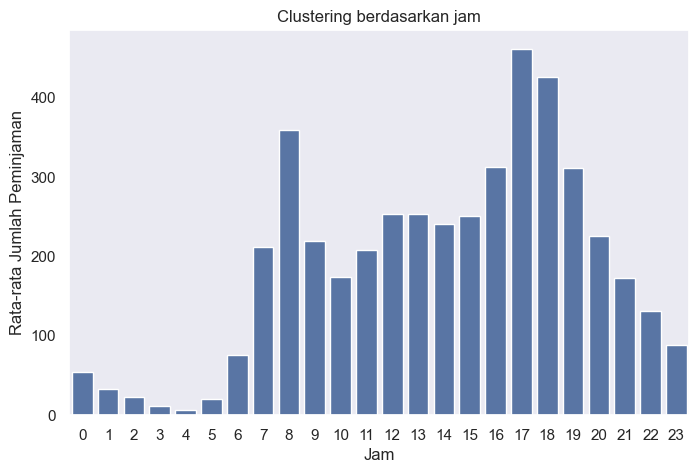

In [34]:
rerata_harian = df_hour.groupby("hr")["cnt"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=rerata_harian["hr"], y=rerata_harian["cnt"])
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Clustering berdasarkan jam")
plt.show()

C:\Users\Fawaz Amajida\AppData\Local\Temp\ipykernel_30128\1745166004.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  klaster_waktu = df_hour.groupby("bin_waktu")["cnt"].mean().reset_index()


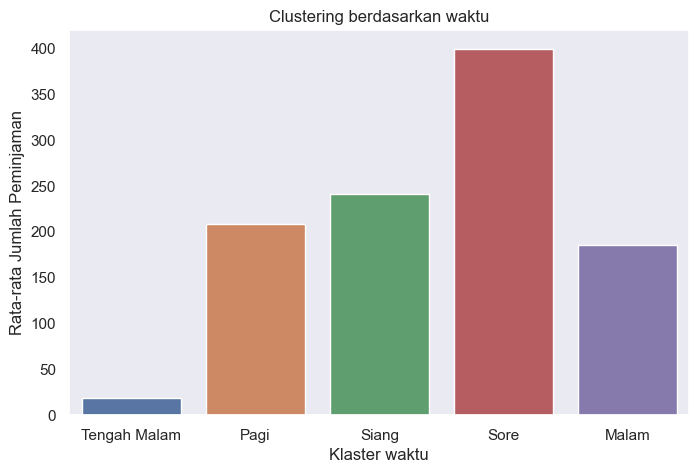

In [35]:
df_hour["bin_waktu"] = pd.cut(df_hour["hr"], bins=[0, 5, 10, 15, 18, 24], labels=["Tengah Malam", "Pagi", "Siang", "Sore", "Malam"])
klaster_waktu = df_hour.groupby("bin_waktu")["cnt"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=klaster_waktu["bin_waktu"], y=klaster_waktu["cnt"], hue=klaster_waktu["bin_waktu"])
plt.xlabel("Klaster waktu")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Clustering berdasarkan waktu")
plt.show()

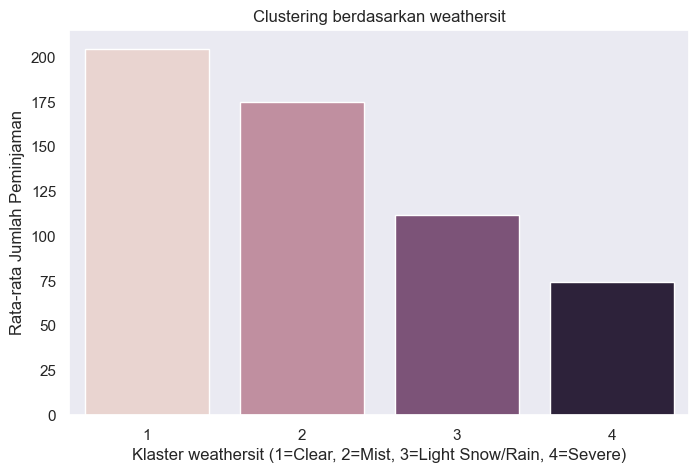

In [36]:
klaster_cuaca = df_hour.groupby("weathersit")["cnt"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=klaster_cuaca["weathersit"], y=klaster_cuaca["cnt"], hue=klaster_cuaca["weathersit"], legend=False)
plt.xlabel("Klaster weathersit (1=Clear, 2=Mist, 3=Light Snow/Rain, 4=Severe)")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Clustering berdasarkan weathersit")
plt.show()

C:\Users\Fawaz Amajida\AppData\Local\Temp\ipykernel_30128\2196500699.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  klaster_temperatur = df_day.groupby("temp_group")["cnt"].mean().reset_index()


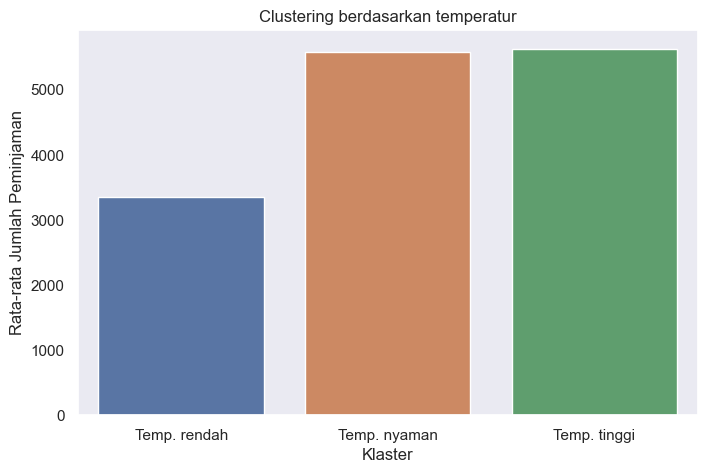

In [37]:
# Berdasarkan US EPA, temperatur lingkungan yang nyaman adalah 20-25 derajat celcius
bins = [0, 20/41, 25/41, 1.0]
labels = ["Temp. rendah", "Temp. nyaman", "Temp. tinggi"]
df_day["temp_group"] = pd.cut(df_day["temp"], bins=bins, labels=labels)
klaster_temperatur = df_day.groupby("temp_group")["cnt"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=klaster_temperatur["temp_group"], y=klaster_temperatur["cnt"], hue=klaster_temperatur["temp_group"], legend=False)
plt.xlabel("Klaster")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Clustering berdasarkan temperatur")
plt.show()

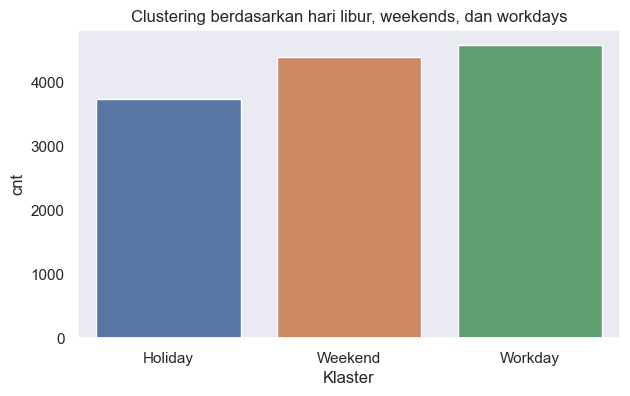

In [38]:
df_day["day_type"] = np.where(df_day["holiday"] == 1, "Holiday", np.where(df_day["workingday"] == 0, "Weekend", "Workday"))
klaster_hari = df_day.groupby("day_type")["cnt"].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.barplot(x=klaster_hari["day_type"], y=klaster_hari["cnt"], hue=klaster_hari["day_type"])
plt.xlabel("Klaster")
plt.title("Clustering berdasarkan hari libur, weekends, dan workdays")
plt.show()

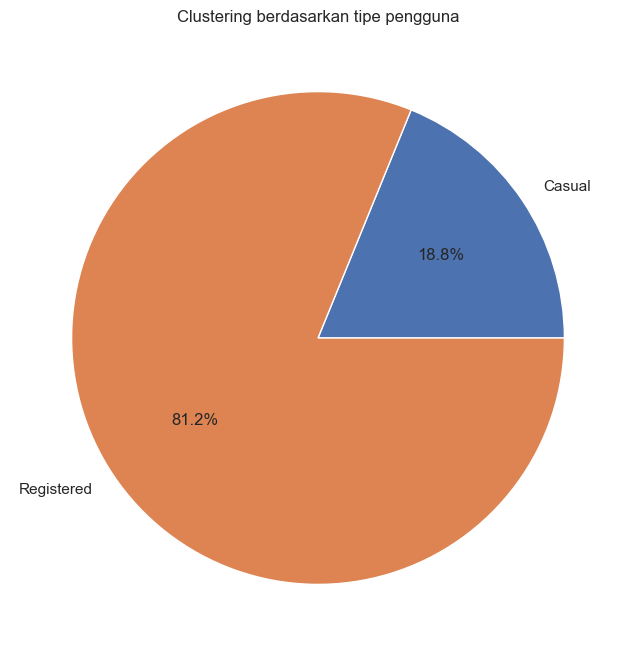

In [39]:
total_casual = df_day["casual"].sum()
total_registered = df_day["registered"].sum()
labels = ["Casual", "Registered"]
proporsi_tipe_pengguna = [total_casual, total_registered]
plt.figure(figsize=(8, 8))
plt.pie(proporsi_tipe_pengguna, labels=labels, autopct='%1.1f%%')
plt.title("Clustering berdasarkan tipe pengguna")
plt.show()

## Conclusion

- Kondisi lingkungan yang mendukung pengguna untuk meminjam sepeda adalah musim gugur, cuaca cerah, temperatur di atas 20 derajat Celcius, dan kelembapan rendah.
- Waktu yang mendukung pengguna untuk meminjam sepeda adalah musim gugur, pagi dan sore hari, serta weekends dan hari libur.
- Strategi yang dapat dilakukan adalah sebagai berikut.
    - Memberi voucher pelanggan baru agar user melakukan pendaftaran.
    - Membuat sistem poin dan daily check-in agar pengguna tertarik membuka aplikasi untuk mengumpulkan poin dan melihat penawaran yang ada.
    - Memberikan voucher cashback yang hanya dapat digunakan untuk transaksi peminjaman selanjutnya agar user melakukan repurchasing.
    - Memberikan voucher diskon kepada registered user pada masa dengan permintaan rendah untuk menaikkan penjualan.
    - Strategi-strategi tersebut juga dapat mendorong casual user untuk mendaftar menjadi registered user. Dengan demikian, perusahaan dapat mengumpulkan data secara lebih komprehensif. Salah satu penggunaan data tersebut adalah untuk personalisasi diskon, cashback, dan tukar poin sesuai behavior user.
    - Melakukan maintenance ketika jumlah permintaan rendah terutama beberapa waktu sebelum permintaan melonjak (untuk mempersiapkan peak hour).